In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
train

#Age 랑 NumOfProducts 를 가지고 사칙연산을 하면 나이에 비해서 (나이 분모면) product 를 많이 사는사람과 아닌사람 

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [8]:
train["Exited"].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [3]:
test=pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [13]:
all_data=pd.concat([train,test])
all_data

all_data2=all_data.drop(columns=["Exited","id"])

In [28]:
train["Surname"].value_counts()
train.groupby("Surname")["Exited"].mean()

Surname
Abazu       0.000000
Abbie       0.250000
Abbott      0.125000
Abdullah    0.000000
Abdulov     0.250000
              ...   
Zubarev     0.142857
Zubareva    0.000000
Zuev        0.157895
Zuyev       0.224138
Zuyeva      0.166667
Name: Exited, Length: 2797, dtype: float64

<Axes: xlabel='Geography', ylabel='count'>

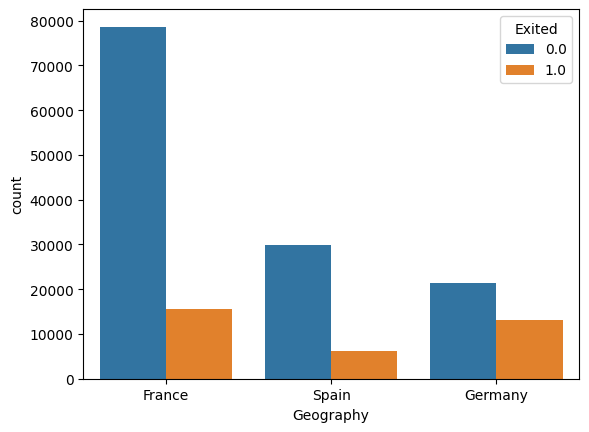

In [30]:
import seaborn as sns
sns.countplot(data=all_data,x="Geography",hue="Exited")

In [11]:
#customerid 같은 id 가 겹치지않을때는 왠만하면 지운다 (train,test 에 겹쳐서 나오거나 중복되면 그 id 가 중요하다고 볼수있기때문에 그 column 을 지우면 안된다 )
#column 내 unique 한 value 지우지말지 결정할때는 value counts로 확인해보기 
all_data["CustomerId"].value_counts()

CustomerId
15682355    193
15570194    163
15686963    159
15585835    150
15782530    149
           ... 
15637365      1
15746748      1
15762992      1
15607787      1
15687541      1
Name: count, Length: 28474, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

cat=all_data2.columns[all_data2.dtypes==object]
cat

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [15]:
for i in cat:
    all_data2[i]=le.fit_transform(all_data2[i])

In [17]:
all_data2.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [18]:
train2=all_data2[:len(train)]
test2=all_data2[len(train):]

In [19]:
#autoML library 를 활용해서 모델비교하기 

from catboost import CatBoostClassifier
cbc=CatBoostClassifier(verbose=100)
cbc.fit(train2, train["Exited"])
#분류대회는 probability (확률) 로 가는게 훨씬 났다 
result=cbc.predict_proba(test2)
result

Learning rate set to 0.091167
0:	learn: 0.6136234	total: 82.1ms	remaining: 1m 21s
100:	learn: 0.3168742	total: 2.54s	remaining: 22.6s
200:	learn: 0.3117502	total: 4.89s	remaining: 19.4s
300:	learn: 0.3076318	total: 7.24s	remaining: 16.8s
400:	learn: 0.3041103	total: 9.6s	remaining: 14.3s
500:	learn: 0.3009313	total: 12s	remaining: 11.9s
600:	learn: 0.2977500	total: 14.4s	remaining: 9.55s
700:	learn: 0.2948128	total: 16.8s	remaining: 7.16s
800:	learn: 0.2921013	total: 19.2s	remaining: 4.77s
900:	learn: 0.2895418	total: 21.6s	remaining: 2.37s
999:	learn: 0.2870385	total: 24.5s	remaining: 0us


array([[0.97077214, 0.02922786],
       [0.14053102, 0.85946898],
       [0.98157533, 0.01842467],
       ...,
       [0.98068289, 0.01931711],
       [0.82840571, 0.17159429],
       [0.82507343, 0.17492657]])

In [4]:
sub=pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")
sub

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5
...,...,...
110018,275052,0.5
110019,275053,0.5
110020,275054,0.5
110021,275055,0.5


In [20]:
#:=모든 행 접근 / 1 은 두번째 column 접근 
sub["Exited"]=result[:,1]

In [21]:
sub

,id,Exited
0,165034,0.029228
1,165035,0.859469
2,165036,0.018425
3,165037,0.190172
4,165038,0.372889
...,...,...
110018,275052,0.029508
110019,275053,0.102706
110020,275054,0.019317
110021,275055,0.171594


In [31]:
sub.to_csv("sub123.csv",index=0)

In [22]:
cbc.feature_importances_

array([ 4.12003624,  8.12374799,  4.79784311,  5.49952898,  3.11850502,
       16.55605346,  2.27068362,  9.29731517, 32.94361043,  0.78776836,
        7.7541738 ,  4.73073383])

In [23]:
pd.Series(cbc.feature_importances_)

0      4.120036
1      8.123748
2      4.797843
3      5.499529
4      3.118505
5     16.556053
6      2.270684
7      9.297315
8     32.943610
9      0.787768
10     7.754174
11     4.730734
dtype: float64

In [25]:
pd.Series(cbc.feature_importances_,index=train2.columns).sort_values(ascending=False)

NumOfProducts      32.943610
Age                16.556053
Balance             9.297315
Surname             8.123748
IsActiveMember      7.754174
Geography           5.499529
CreditScore         4.797843
EstimatedSalary     4.730734
CustomerId          4.120036
Gender              3.118505
Tenure              2.270684
HasCrCard           0.787768
dtype: float64